#### Copy for study 
#### [link](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

#### 때로는 삶이 잔인한 유머감각을 가지고 있어, 가능한 한 최악의 시기에 항상 원했던 것을 너에게 준다.  <div style="text-align: right">`-Lisa Kleypas-`</div>
&nbsp;&nbsp;
타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나이다. 1912년 4월 15일 처녀항해 중 타이타닉호는 빙산과 충돌한 뒤 침몰해 승객과 승무원 2224명 중 1502명이 사망했다. 
<br> &nbsp;&nbsp;
그래서 **DieTanic**이라는 이름이 생긴 것이다. 이것은 이 세상 어느 누구도 잊을 수 없는 매우 용서할 수 없는 재앙이다.


&nbsp;&nbsp;타이타닉호를 만드는 데 약 750만 달러가 걸렸고 충돌로 인해 바다 밑으로 가라앉았다. Titanic Dataset은 data science로 갈 때 초심자일 때 좋은 데이터이고 Kaggle에 참여하기 좋은 대회이다.


&nbsp;&nbsp;이 노트북의 `목적`은 **예측 모델링 문제에서 workflow가 어떻게 되는지를 알아내는 것**이다. features를 확인하고, 새로운 features를 생성하고 Machine Learning 개념을 알아가보자. 나는 초보들도 모든 단계를 이해할 수 있도록 가능한 한 기본을 지키려고 노력했다.

### <div style="text-align:center">- Notebook 목차 -</div>

#### Part1: Exploratory Data Analysis(EDA)
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.
#### Part2: Feature Engineering and Data Cleaning
1) Adding any few features.

2) Removing redundant features.

3) Converting features into suitable form for modeling.
#### Part3: Predictive Modeling
1) Running Basic Algorithms.

2) Cross Validation.

3) Ensembling.

4) Important Features Extraction.

### Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Age, Cabin, Embarked**는 null 값이 있다.

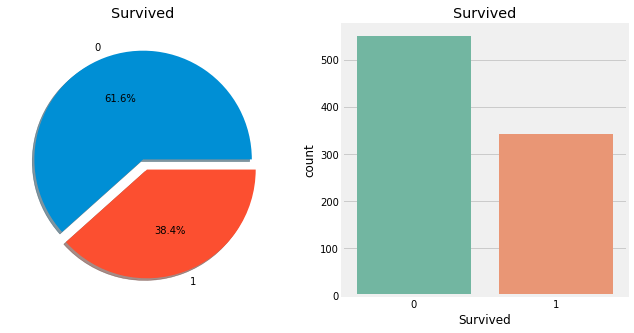

In [45]:
f, ax = plt.subplots(1,2,figsize=(10,5)) # (1,2) 모양으로 도화지 생성
# pie plot / explode : 간격 / autopct : 값 입력 / ax=ax[0] : 도화지 위치 설정 / shadow : 그림자 설정
data['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct='%.1f%%',
                                         ax=ax[0],shadow=True)
ax[0].set_title('Survived'); ax[0].set_ylabel('');

sns.countplot('Survived',data=data,ax=ax[1],palette="Set2")
ax[1].set_title('Survived')
plt.show()

&nbsp;&nbsp;그 사고에서 살아남은 승객은 많지 않다는 것은 명백하다.

&nbsp;&nbsp;훈련 세트 승객 891명 중 350명 정도만 살아남았다. 즉, 전체 훈련 세트의 **38.4%**만이 추락에서 살아남았다.우리는 데이터로부터 더 나은 통찰력을 얻고 categorie별 승객들의 생존 여부를 알아보자.우리는 데이터 세트의 다양한 feature을 사용해 생존율을 확인할 것이다.

&nbsp;&nbsp;먼저 feature별 어떤 유형이 있는지 확인해보자.

- **feature 종류**
    - 번